In [5]:
import numpy as np
import pandas as pd

# for data viz
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure 




# for the regression analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk(r'C:\Users\kathe\Documents\python first Project\movies.csv'):
    for filename in filenames:
        data = os.path.join(dirname, filename)

plt.style.use('ggplot')



 

# Movie Industry Data set

In [60]:

df = pd.read_csv(r'C:\Users\kathe\Documents\python first Project\movies.csv')
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Cleaning and trasnformation 

In [9]:
#Cleaning and trasnformation 'Data type'


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Null Values

* checking what percentage of the dataset is represented by nulls

In [10]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


* Drop NAs, considering that they represent a very small percentage of our dataset

In [ ]:
df.dropna(inplace=True)

# Duplicates

In this particular case, the most reasonable approach to check for duplicates would be through the name column (since duplicates would be expected for the rest of the columns). Nevertheless, after little investigation, we can see that the duplicates in this column are actually either remakes or simply homonyms. Therefore, we will not exclude any.


In [12]:
#Dealing with duplicates
#A piece of the dataframe, to illustrate:

df[df.name.duplicated(keep=False)].sort_values(by='name',ascending=True).head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5712,A Nightmare on Elm Street,R,Crime,2010,"April 30, 2010 (United States)",5.2,95000.0,Samuel Bayer,Wesley Strick,Jackie Earle Haley,United States,35000000.0,1.156952e+08,New Line Cinema,95.0
483,A Nightmare on Elm Street,R,Horror,1984,"November 16, 1984 (United States)",7.5,212000.0,Wes Craven,Wes Craven,Heather Langenkamp,United States,1800000.0,2.550714e+07,New Line Cinema,91.0
7481,Aladdin,PG,Adventure,2019,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000.0,1.050694e+09,Walt Disney Pictures,128.0
2056,Aladdin,G,Animation,1992,"November 25, 1992 (United States)",8.0,382000.0,Ron Clements,Ron Clements,Scott Weinger,United States,28000000.0,5.040502e+08,Walt Disney Pictures,90.0
3196,Anna Karenina,PG-13,Drama,1997,"April 4, 1997 (United States)",6.3,5600.0,Bernard Rose,Lev Tolstoy,Sophie Marceau,United States,35000000.0,8.585530e+05,Icon Entertainment International,108.0
6099,Anna Karenina,R,Drama,2012,"September 7, 2012 (United Kingdom)",6.6,95000.0,Joe Wright,Tom Stoppard,Keira Knightley,United Kingdom,40600000.0,6.892915e+07,Universal Pictures,129.0
6471,Annie,PG,Comedy,2014,"December 19, 2014 (United States)",5.3,35000.0,Will Gluck,Will Gluck,Quvenzhané Wallis,United States,65000000.0,1.368535e+08,Marcy Media,118.0
213,Annie,PG,Comedy,1982,"June 18, 1982 (United States)",6.6,41000.0,John Huston,Carol Sobieski,Aileen Quinn,United States,50000000.0,5.706386e+07,Columbia Pictures,127.0
2815,Bad Company,R,Crime,1995,"January 20, 1995 (United States)",5.4,2800.0,Damian Harris,Ross Thomas,Ellen Barkin,United States,15000000.0,3.674841e+06,Touchstone Pictures,108.0
4191,Bad Company,PG-13,Action,2002,"June 7, 2002 (United States)",5.6,45000.0,Joel Schumacher,Gary M. Goodman,Anthony Hopkins,United States,70000000.0,6.620078e+07,Touchstone Pictures,116.0


# Adjusting data types and transforming columns

A brief description of what the following transformations aim to do: 

* Adjust the data types of budget, gross and votes to integer
* Split the released column into released_date and released_country. Then change the released_date data type to a time series.
* Drop the released column. Insert the released_date year as the year column.
* Renamed the 'not rated' values in the rating column to simply 'unranked' (which is also a label), to reduce redundancy

In [14]:

df.budget = df.budget.astype(int)
df.gross = df.gross.astype(int)
df.votes = df.votes.astype(int)


# Exploratory Data Analysis

Before moving further into the actual analysis, let's explore the dataset through some visualizations.

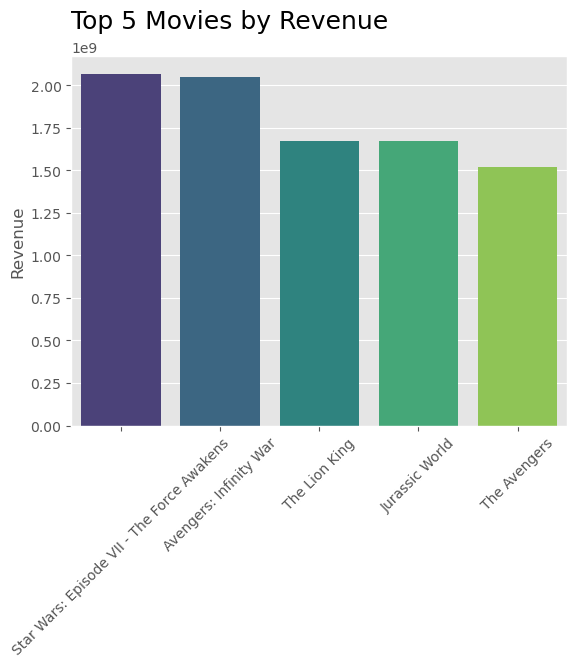

In [18]:

#1 What are the top 5 movies by gross revenue?

top5 = df.sort_values(by='gross', ascending=False).head(5)
sns.barplot(x='name', y='gross', data=top5, palette='viridis');
plt.xticks(rotation=45);
plt.xlabel('');
plt.ylabel('Revenue');
plt.title('Top 5 Movies by Revenue', loc='left', fontsize=18, pad=20);

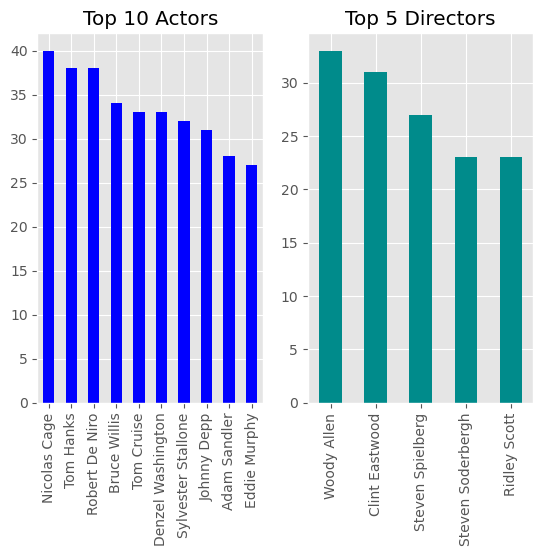

In [24]:
#2 What are the stars that made the most movies in this period of time? And the directors?

star = df.star.value_counts().head(10)
direc = df.director.value_counts().head(5)

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
star.plot(kind='bar', ax=ax1, color='b', title='Top 10 Actors'); #Actors by Number of Movies'
direc.plot(kind='bar', ax=ax2, color='darkcyan', title='Top 5 Directors');

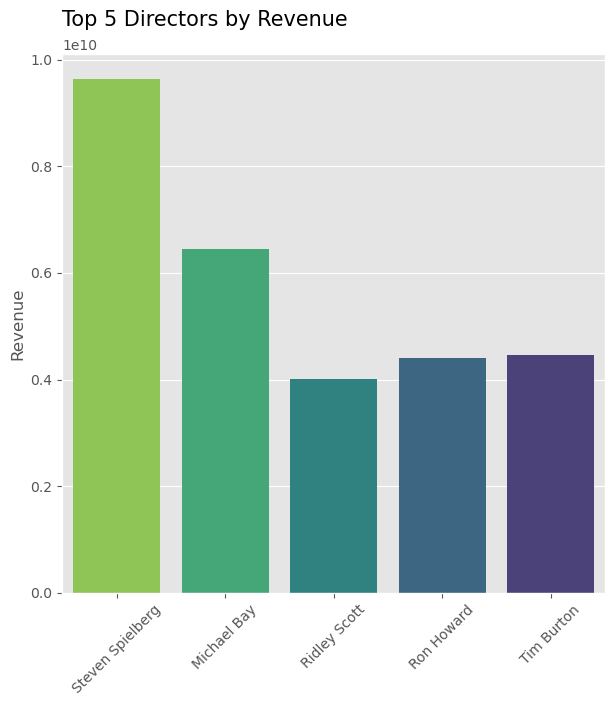

In [13]:
#3 What are the directors that have generated the most revenue?

direc_rev = df.groupby('director').sum().sort_values(by='budget', ascending=False).head(5)
sns.barplot(x=direc_rev.index, y='gross', data=direc_rev, palette='viridis_r');
plt.xticks(rotation=45);
plt.xlabel('');
plt.ylabel('Revenue');
plt.title('Top 5 Directors by Revenue', loc='left', fontsize=15, pad=20);

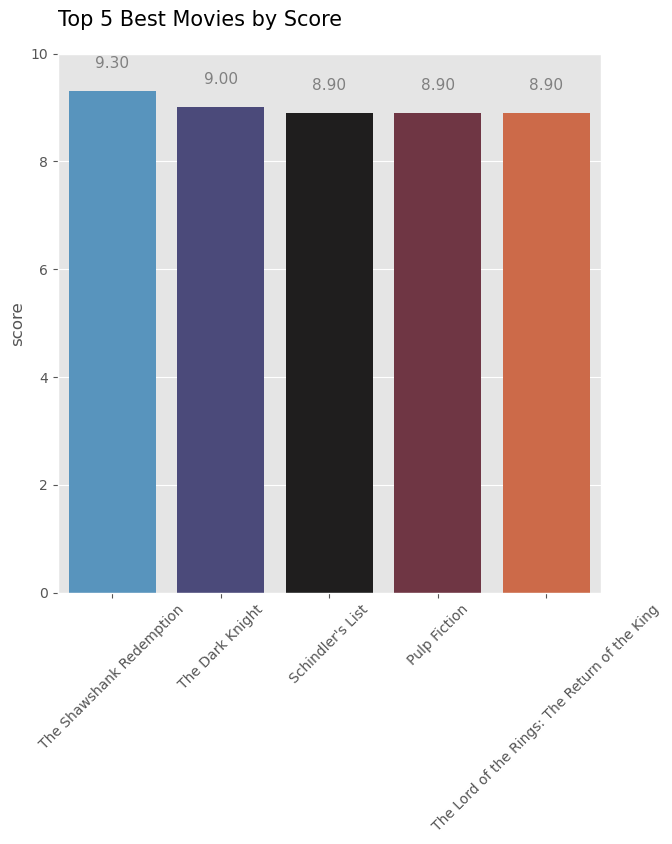

In [11]:
#5 What are the best movies by score?

best_movies = df.sort_values(by='score', ascending=False).head(5)
g = sns.barplot(x='name', y='score', data=best_movies, palette='icefire');
ax = g
plt.xticks(rotation=45);
plt.xlabel('');
plt.title('Top 5 Best Movies by Score', loc='left', fontsize=15, pad=20);

# displaying the scores:
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                textcoords='offset points')
_ = g.set_ylim(0,10) 

# Movies released by year impact on revenue

In 2020, we obviously had the surge of the Covid-19 pandemic, which clearly impacted the movie industry, as the graph denotes. 

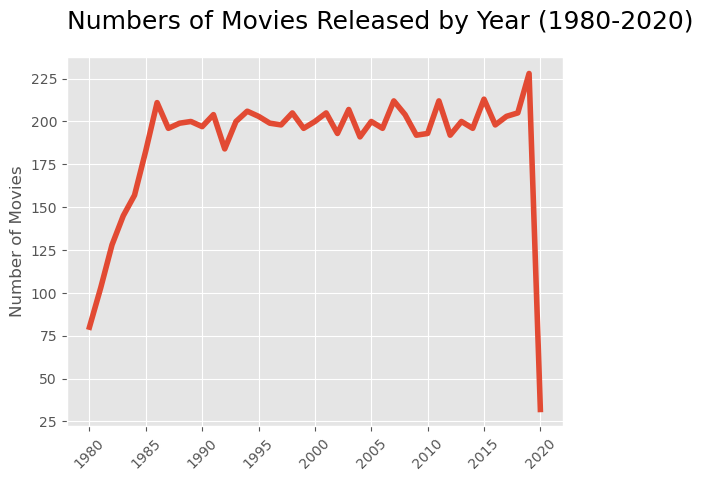

In [16]:

release_year = df.groupby('year').count()
sns.lineplot(x=release_year.index, y='name', data=release_year, linewidth=4);
plt.xticks(rotation=45);
plt.xlabel('');
plt.ylabel('Number of Movies');
plt.title('Numbers of Movies Released by Year (1980-2020)', loc='left', fontsize=18, pad=20);
year_rev = df.groupby('year').sum()['gross']
year_rev_pct = year_rev.pct_change()

* Let's briefly see its impact on revenue:

In [14]:


rev_df = pd.DataFrame({
    'Yearly Revenue': year_rev, 
    'Yearly Revenue (%)': year_rev_pct * 100
    })

rev_df.iloc[-10:]

,Yearly Revenue,Yearly Revenue (%)
year,,
2011.0,2.435060e+10,4.493572
2012.0,2.583063e+10,6.078004
2013.0,2.591395e+10,0.322534
2014.0,2.516504e+10,-2.889967
2015.0,2.786500e+10,10.729009
2016.0,2.777828e+10,-0.311215
2017.0,2.981339e+10,7.326257
2018.0,2.856557e+10,-4.185426
2019.0,3.019710e+10,5.711502


# Correlation Analysis
        

The idea is to identify and investigate the features that are most highly correlated to gross revenue

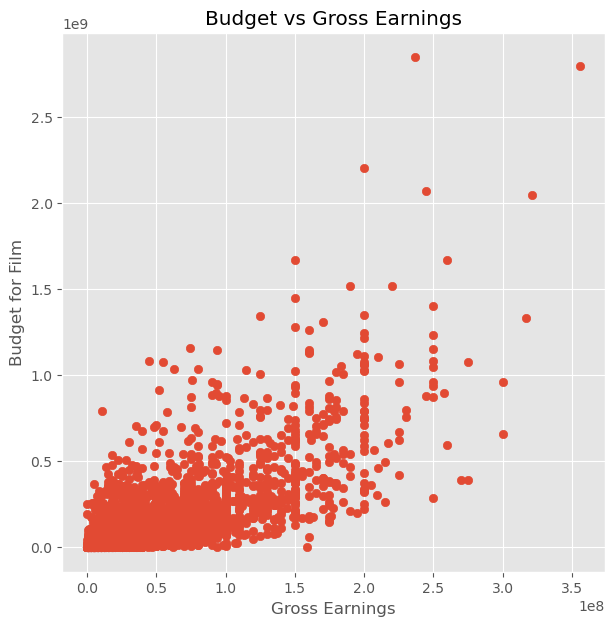

In [10]:
# Creating a scatter Plot with budget vs gross revenue 

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (7,7)

pd.options.mode.chained_assignment = None


plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

* Regplot for a linear reg line

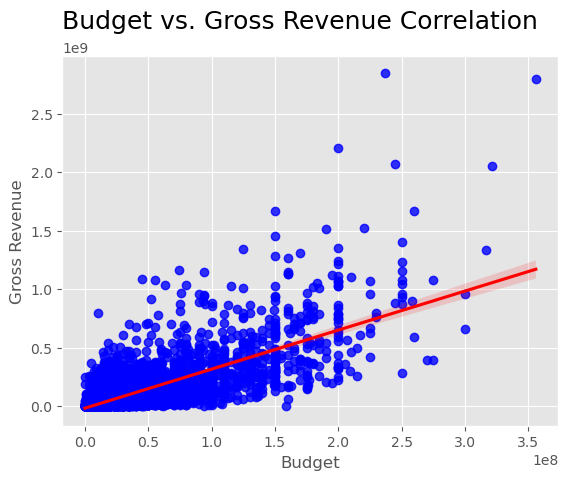

In [56]:

sns.regplot(data=df, x='budget', y='gross', color='b', line_kws={'color':'r'});
plt.title('Budget vs. Gross Revenue Correlation', loc='left', fontsize=18, pad=20);
plt.xlabel('Budget');
plt.ylabel('Gross Revenue');

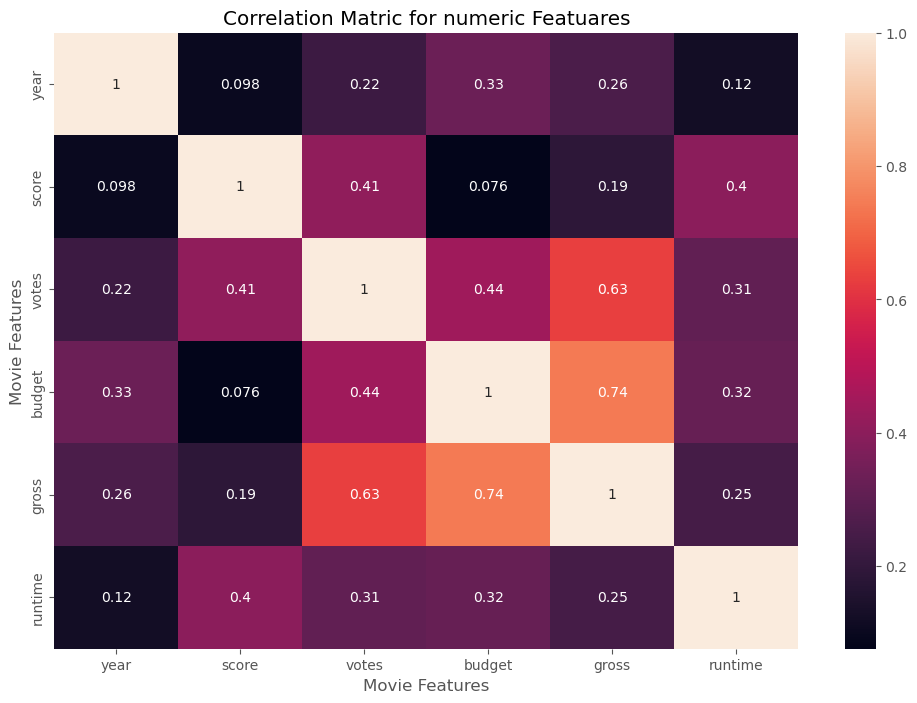

In [69]:
Correlation_matrix = df.corr(method='pearson')

sns.heatmap(Correlation_matrix, annot=True)

plt.title('Correlation Matric for numeric Featuares')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


plt.show()

# Categorical variables

The following simply transforms each variable of the 'object' type to 'category', so they can be used for correlation analysis.


In [39]:
#Dealing with the categorical variables

df_num = df.copy()

for col in df_num.columns:
    if (df_num[col].dtype == 'object'):
        df_num[col] = df_num[col].astype('category')
        df_num[col] = df_num[col].cat.codes

df_num.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country
0,4692,5,6,1980,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980-06-13,47
1,3929,5,1,1980,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980-07-02,47
2,3641,3,0,1980,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980-06-20,47
3,204,3,4,1980,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980-07-02,47
4,732,5,4,1980,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980-07-25,47


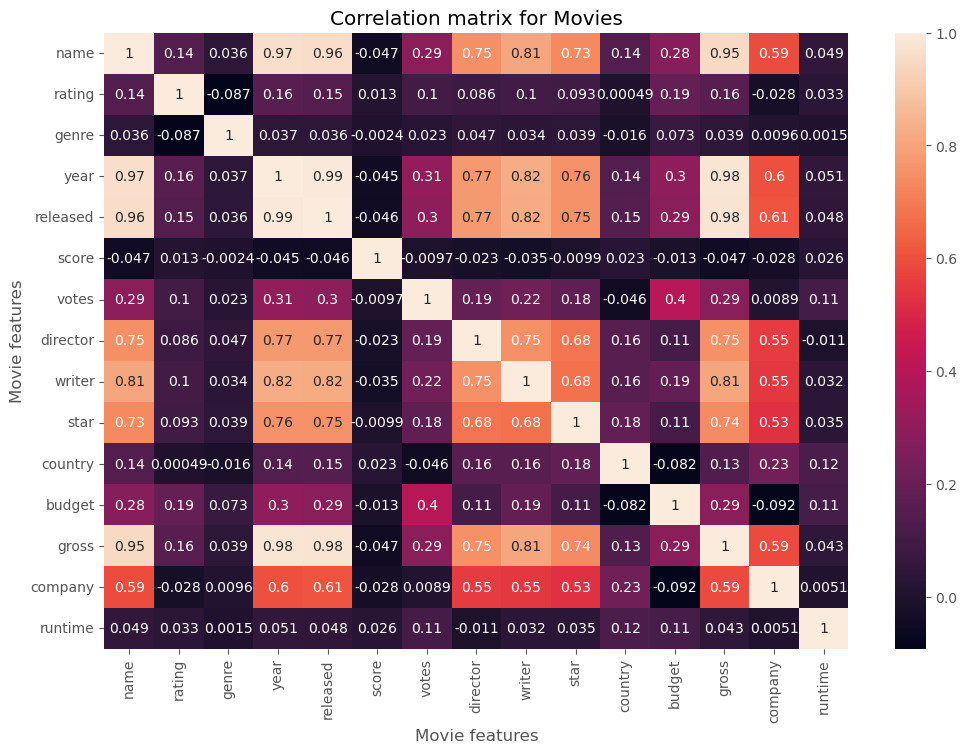

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

# Checking for high correlation

In [48]:
#Checking for high correlation

corr_mat = df_num.corr().unstack().sort_values(ascending=False)
corr_mat[((corr_mat) > .3) & ((corr_mat) != 1)]

budget   gross      0.669203
gross    budget     0.669203
         votes      0.550649
votes    gross      0.550649
         score      0.474256
score    votes      0.474256
budget   votes      0.439675
votes    budget     0.439675
score    runtime    0.414068
runtime  score      0.414068
         votes      0.352303
votes    runtime    0.352303
budget   year       0.320312
year     budget     0.320312
runtime  budget     0.318695
budget   runtime    0.318695
dtype: float64